In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
data=pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

In [3]:
data["Effective To Date"] = pd.to_datetime(data["Effective To Date"])

In [4]:
data.columns = data.columns.str.lower()


In [5]:
data=data.set_index("customer")

In [6]:
categoricals = data.select_dtypes(np.object)


In [7]:
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


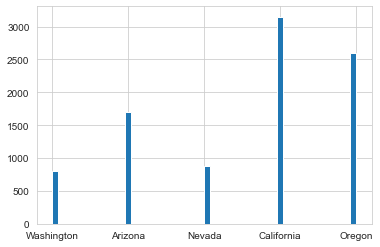

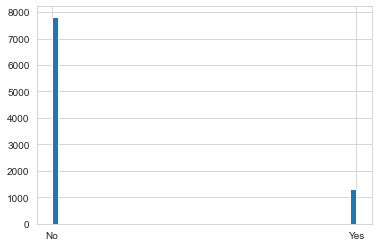

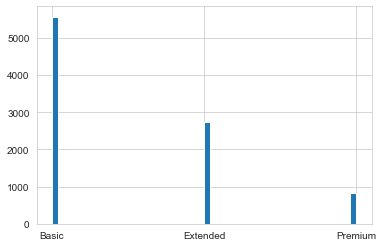

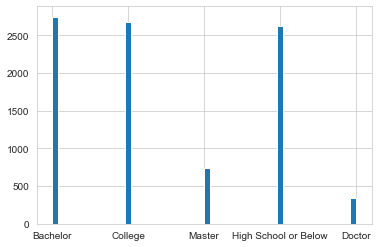

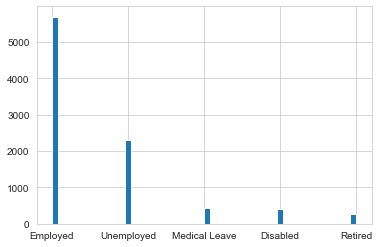

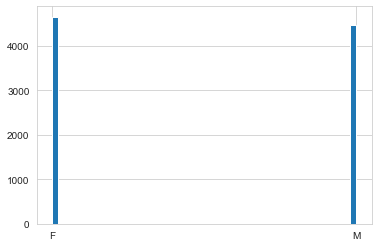

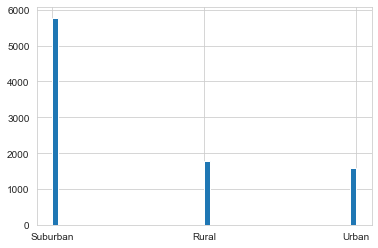

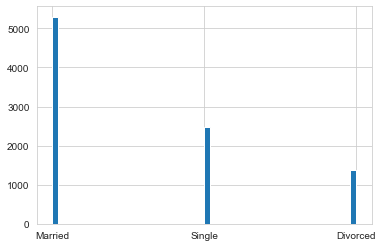

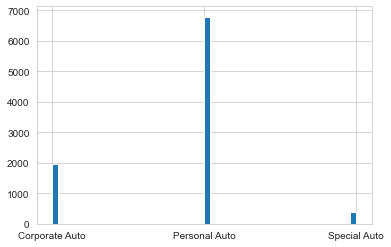

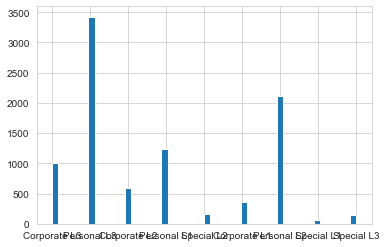

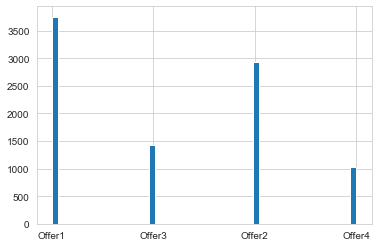

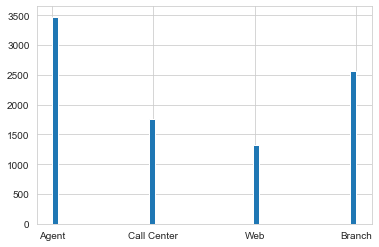

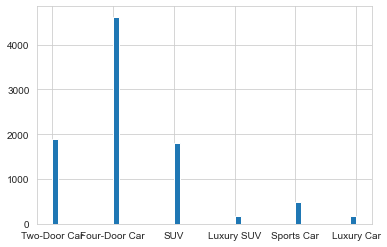

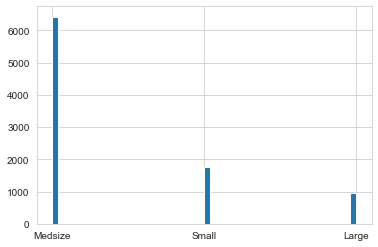

In [8]:
for x in categoricals.columns:
    plt.hist(categoricals[x], bins=50)
    plt.show()

not everything seems to be equality distributed. There might be a chance to group some features together. Some others have only a few values, these are maybe canditates for encoding

There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [9]:
# we can drop policy type since the information is also avariable in the Column Policy

In [10]:
categoricals=categoricals.drop(["policy type"],axis=1)

In [11]:
data.head()

,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [12]:
data.head()

,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


we convert into timestamp since its better to work with, also u can see if when are the people more active. 
With Datetime youn can figure out the sesonality of a company for exsample

In [13]:
data["effective to date"]=data["effective to date"].apply(pd.Timestamp)

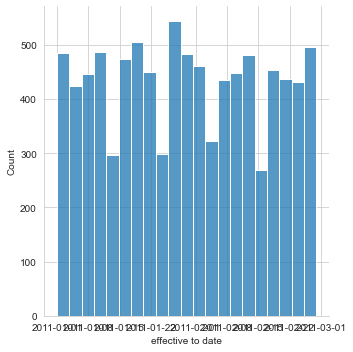

In [14]:
sns.displot(data['effective to date'])
plt.show()

## Lab 2

In [15]:
def log_transform_clean(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

In [16]:
data['customer lifetime value'] = list(map(log_transform_clean, data['customer lifetime value']))
data['monthly premium auto'] = list(map(log_transform_clean, data['monthly premium auto']))

In [17]:
# We knew from yesterday that these two were the ones with the most outliers, thats why we use log transform on them

In [18]:
data_copy=data

In [19]:
def con_dis_classifier (df):
    continuous  = []
    discrete    = []
    cat = []
    for col in df.columns:
        if(df[col].dtypes == object): #OBJECTS
            cat.append(str(col))
        else:
            if(df[col].dtypes == np.number): #NUMBERS
                if (len(df[col].unique())) > 202:
                    continuous.append(str(col))
                else:
                    discrete.append(str(col))
            else:
                cat.append(str(col))
            
    return continuous,discrete, cat

In [20]:
continuous,discrete, cat = con_dis_classifier(data_copy)

In [21]:
continuous_data  = data_copy[continuous]
discrete_data    = data_copy[discrete]
categorical_data = data_copy[cat]

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [23]:
categorical_data.head()

,state,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
customer,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## Scaling

In [24]:
scaler_x = StandardScaler().fit(continuous_data)
Conti_scaled = pd.DataFrame(scaler_x.transform(continuous_data),columns=continuous_data.columns)

## Transform Ordinals

In [25]:
categorical_data["coverage"] = categorical_data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})


In [26]:
categorical_data["employmentstatus"] = categorical_data["employmentstatus"].map({"Unemployed" : 0, "Medical Leave" : 0, "Employed" : 1,"Disabled":0,"Retierd":0})

In [27]:
categorical_data["location code"] = categorical_data["location code"].map({"Urban" : 0, "Suburban" : 1, "Rural" : 2})

In [28]:
categorical_data["vehicle size"] = categorical_data["vehicle size"].map({"Medsize" : 1, "Small" : 0, "Large" : 2})

##  Encoding

In [29]:
toencode=["marital status","policy","renew offer type","sales channel","vehicle class","education","gender","response","state"]

In [30]:
def dummies(data, column):
    bp_dummies = pd.get_dummies(data[column])
    data = pd.concat([data, bp_dummies], axis = 1)
    data.drop([column], axis = 1, inplace = True)
    return data

In [31]:
for dummy in toencode:
       categorical_data = dummies(categorical_data,dummy)

In [32]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   coverage                       9134 non-null   int64         
 1   effective to date              9134 non-null   datetime64[ns]
 2   employmentstatus               8852 non-null   float64       
 3   income                         9134 non-null   int64         
 4   location code                  9134 non-null   int64         
 5   months since last claim        9134 non-null   int64         
 6   months since policy inception  9134 non-null   int64         
 7   number of open complaints      9134 non-null   int64         
 8   number of policies             9134 non-null   int64         
 9   policy type                    9134 non-null   object        
 10  vehicle size                   9134 non-null   int64         
 11  Divorced     

In [33]:
#converting time to timestamps
categorical_data["effective to date"]=categorical_data["effective to date"].apply(pd.Timestamp)

In [34]:
import time

pattern = '%Y-%m-%d %H:%M:%S'
epoch = int(time.mktime(time.strptime(str(categorical_data['effective to date'][1]), pattern)))


print (round(epoch / 86400))

15005


In [35]:
categorical_data['effective to date']=categorical_data['effective to date'].apply(lambda x: (int(time.mktime(time.strptime(str(x), '%Y-%m-%d %H:%M:%S')))/86400))

In [36]:
categorical_data

,coverage,effective to date,employmentstatus,income,location code,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,vehicle size,Divorced,Married,Single,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3,Offer1,Offer2,Offer3,Offer4,Agent,Branch,Call Center,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Bachelor,College,Doctor,High School or Below,Master,F,M,No,Yes,Arizona,California,Nevada,Oregon,Washington
customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,0,15028.958333,1.0,56274,1,32,5,0,1,Corporate Auto,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1
QZ44356,1,15004.958333,0.0,0,1,13,42,0,8,Personal Auto,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0
AI49188,2,15023.958333,1.0,48767,1,18,38,0,2,Personal Auto,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0
WW63253,0,14993.958333,0.0,0,1,18,65,0,7,Corporate Auto,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0
HB64268,0,15007.958333,1.0,43836,2,12,44,0,1,Personal Auto,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,0,15014.958333,1.0,71941,0,18,89,0,2,Personal Auto,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0
PK87824,1,15016.958333,1.0,21604,1,14,28,0,1,Corporate Auto,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
TD14365,1,15010.958333,0.0,0,1,9,37,3,2,Corporate Auto,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0


In [37]:
categorical_data.drop(["policy type","employmentstatus"],axis=1,inplace= True)

In [38]:
#data['week'] = data['effective_to_date'].apply(lambda x: x.week)

In [39]:
clean_data = pd.concat([categorical_data, discrete_data,continuous_data], axis = 1)

In [40]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coverage                       9134 non-null   int64  
 1   effective to date              9134 non-null   float64
 2   income                         9134 non-null   int64  
 3   location code                  9134 non-null   int64  
 4   months since last claim        9134 non-null   int64  
 5   months since policy inception  9134 non-null   int64  
 6   number of open complaints      9134 non-null   int64  
 7   number of policies             9134 non-null   int64  
 8   vehicle size                   9134 non-null   int64  
 9   Divorced                       9134 non-null   uint8  
 10  Married                        9134 non-null   uint8  
 11  Single                         9134 non-null   uint8  
 12  Corporate L1                   9134 non-null

In [41]:
clean_data.head()

,coverage,effective to date,income,location code,months since last claim,months since policy inception,number of open complaints,number of policies,vehicle size,Divorced,Married,Single,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3,Offer1,Offer2,Offer3,Offer4,Agent,Branch,Call Center,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Bachelor,College,Doctor,High School or Below,Master,F,M,No,Yes,Arizona,California,Nevada,Oregon,Washington,monthly premium auto,customer lifetime value,total claim amount
customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,0,15028.958333,56274,1,32,5,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,4.234107,7.924260,384.811147
QZ44356,1,15004.958333,0,1,13,42,0,8,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,4.543295,8.850738,1131.464935
AI49188,2,15023.958333,48767,1,18,38,0,2,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,4.682131,9.464008,566.472247
WW63253,0,14993.958333,0,1,18,65,0,7,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,4.663439,8.941920,529.881344
HB64268,0,15007.958333,43836,2,12,44,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,4.290459,7.942253,138.130879


## Lab 1 Day 3 Week 4

In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [42]:
target=clean_data["total claim amount"]

In [43]:
clean_data.drop(["total claim amount"],axis=1,inplace=True)

In [44]:
X=clean_data

In [45]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coverage                       9134 non-null   int64  
 1   effective to date              9134 non-null   float64
 2   income                         9134 non-null   int64  
 3   location code                  9134 non-null   int64  
 4   months since last claim        9134 non-null   int64  
 5   months since policy inception  9134 non-null   int64  
 6   number of open complaints      9134 non-null   int64  
 7   number of policies             9134 non-null   int64  
 8   vehicle size                   9134 non-null   int64  
 9   Divorced                       9134 non-null   uint8  
 10  Married                        9134 non-null   uint8  
 11  Single                         9134 non-null   uint8  
 12  Corporate L1                   9134 non-null

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=100)

Try a simple linear regression with all the data to see whether we are getting good results.

In [48]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
lm_predictions  = lm.predict(X_test)


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,lm_predictions)
MSE = mean_squared_error(y_test,lm_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,lm_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 129.14
The mean squared error of the model in the test set is: 31211.51
The root mean squared error of the model in the test set is: 176.67
The R2 of the model in the test set is: 0.61


In [78]:
def Modell (X,y,kind):

    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=100)


    if kind == "linear":
        from sklearn import linear_model
        
        lm = linear_model.LinearRegression()
        model = lm.fit(X_train,y_train)
        predictions  = lm.predict(X_test)
        predictions_df = pd.DataFrame(predictions,columns=[y.name])
    # K-Nerest Neighbors
    elif kind == "KNN":
        from sklearn.neighbors import KNeighborsRegressor
        
        knn_model = KNeighborsRegressor(n_neighbors=5)
        knn_model.fit(X_train, y_train)
        predictions = knn_model.predict(X_test)
        predictions_df = pd.DataFrame(predictions,columns=[y.name])
    #MLPRegressor
    elif kind == "MLP":

        from sklearn.neural_network import MLPRegressor
        from sklearn.datasets import make_regression
       
                                                             
        regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
        predictions = regr.predict(X_test)
        predictions_df = pd.DataFrame(predictions,columns=[y.name])
    
    elif kind == "Poly":
        from sklearn.linear_model import Ridge
        from sklearn.preprocessing import PolynomialFeatures
        from sklearn.pipeline import make_pipeline
        
        fitt_model = make_pipeline(PolynomialFeatures(2), Ridge()).fit(X_train, y_train)
        predictions = fitt_model.predict(X_test)
        predictions_df = pd.DataFrame(predictions,columns=[y.name])

        
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
    MAE = mean_absolute_error(y_test,predictions)
    MSE = mean_squared_error(y_test,predictions)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,predictions)

    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print("The R2 of the model in the test set is: %4.2f" % (R2))
    
    sns.scatterplot(y = predictions, x = y_test)
    
    return X_train, X_test, predictions,predictions_df

The mean absolute error of the model in the test set is: 129.14
The mean squared error of the model in the test set is: 31211.51
The root mean squared error of the model in the test set is: 176.67
The R2 of the model in the test set is: 0.61


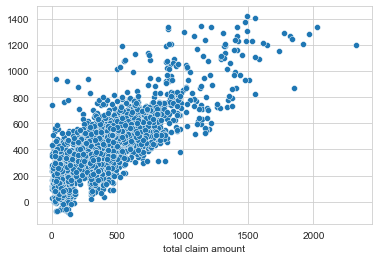

In [79]:
X_train, X_test, predictions, predictions_df = Modell(X,target,"linear")

In [ ]:
make_pipeline(PolynomialFeatures(2), Ridge())

In [ ]:
def log_regression(x_scaled,y,random,multi_class): #random=int, multiclass=str from ('multinomial','ova')
    
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import cohen_kappa_score
    
    X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=random, random_state=100)
    
    classification = LogisticRegression(random_state=0, solver='lbfgs',
    multi_class=multi_class).fit(X_train, y_train)
    predictions = pd.DataFrame(classification.predict(X_test))
    classification.score(X_test, y_test)
    
    
    
    print("The accuracy of the model in the TEST set is: ", round(classification.score(X_test, y_test),2))
    print("The kappa of the model is: ", cohen_kappa_score(y,classification.predict(x_scaled)))
    
    
    return X_train, X_test, y_train, y_test, classification, predictions